In [12]:
import tensorflow as tf
import numpy as np

model_file = 'face_detection_front.tflite'
interpreter = tf.lite.Interpreter(
    model_path=model_file)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# print(f'input_details {input_details}')
print(f'output_details {output_details}')

output_details [{'name': 'regressors', 'index': 175, 'shape': array([  1, 896,  16], dtype=int32), 'shape_signature': array([  1, 896,  16], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'classificators', 'index': 174, 'shape': array([  1, 896,   1], dtype=int32), 'shape_signature': array([  1, 896,   1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


array([[[  0.6183613,  -1.0195287,  24.188194 , ...,  -2.2877297,
           5.7262807,  -2.663369 ],
        [  0.3922332,   0.5042201,  35.692986 , ...,  -2.9249685,
           9.876149 ,  -2.1292908],
        [  1.05423  ,  -1.2612784,  23.513943 , ...,  -4.2093263,
           9.674111 ,  -3.2273054],
        ...,
        [  9.001363 ,   1.7649622, 112.838135 , ..., -30.039286 ,
          45.39967  ,   4.7604795],
        [  7.6603518,   4.0388308, 130.63792  , ..., -32.733013 ,
          46.700806 ,   4.041053 ],
        [ 10.441973 ,   7.6050396, 155.27887  , ..., -37.208202 ,
          53.431755 ,   1.6845987]]], dtype=float32)

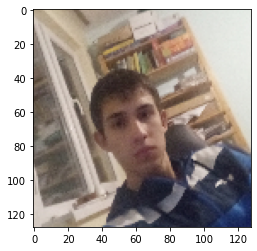

In [14]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('smallme.jpg')
# plt.imshow(image[:,:,::-1])

image_cropped = image[:image.shape[0], :image.shape[0], ::-1] # crop to avoid letterboxing step
# plt.imshow(image_cropped)

img = cv2.resize(image_cropped, (128, 128))[np.newaxis, :, :, :]
plt.imshow(img[0])
img = (np.float32(img) - 0.0) / 255.0  # normalization (specified in tflite_converter_calculator, not in model card)

#img = (np.float32(img) - 0.0) / 255.0 # normalization (specified in tflite_converter_calculator, not in model card)
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

output0 = interpreter.get_tensor(output_details[0]['index'])
output1 = interpreter.get_tensor(output_details[1]['index'])

output0
